## Домашнее задание к занятию "A/B-тесты"

### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
import warnings
# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

import pandas as pd

from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro

pokemon = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv', on_bad_lines='skip')  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
pokemon.info()

In [ ]:
from scipy import stats
import seaborn
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.stats.multicomp as mc

### Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `Grass` имеют более сильную обычную атаку, чем покемоны в классе `Rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon[pokemon.duplicated('Name')]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary


In [ ]:
# Фильтруем датафрейм с необходимыми данными
pokemon_Attack = pokemon.loc[pokemon['Class 1'].isin(['Grass', 'Rock']) | pokemon['Class 2'].isin(['Grass', 'Rock']), ['Name', 'Class 1', 'Class 2', 'Attack']].sort_values(by='Name')
pokemon_Attack.info()


<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 510 to 458
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     151 non-null    object
 1   Class 1  151 non-null    object
 2   Class 2  109 non-null    object
 3   Attack   151 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.9+ KB


In [ ]:
pokemon_Attack.value_counts('Name').sum()# Нет покемонов, которые относились бы к обоим классам. 151 Уникальных имен в 151 строках.

151

In [ ]:
Grass_Attack = pokemon.loc[pokemon['Class 1'].isin(['Grass']) | pokemon['Class 2'].isin(['Grass'])]['Attack'].values # формируем данные класса numpy.ndarray
Rock_Attack = pokemon.loc[pokemon['Class 1'].isin(['Rock']) | pokemon['Class 2'].isin(['Rock'])]['Attack'].values

In [ ]:
print(len(Grass_Attack), len(Rock_Attack)) # количество данных

95 58


In [ ]:
# Проверка распределения данных на нормальность
def shapiro_(data, a=0.05):
  stat, p = stats.shapiro(data)
  if p > a:
    return f"Вероятнее всего распределение является нормальным: p-value - {p:.5f}; Статистика - {stat:.5f}"
  return f"Вероятнее всего распределение является ненормальным: p-value - {p:.5f}; Статистика - {stat:.5f}"


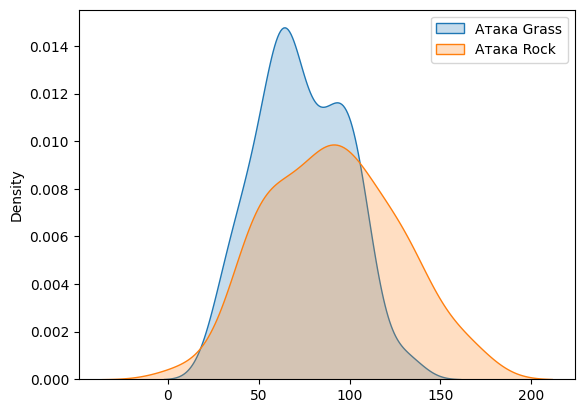

In [ ]:
# Графики распределения
seaborn.kdeplot(data=Grass_Attack, label='Атака Grass', fill=True)
seaborn.kdeplot(data=Rock_Attack, label='Атака Rock', fill=True)
plt.legend()
plt.show();

In [ ]:
print(f"Средняя для Grass_Attack: {round(np.mean(Grass_Attack), 2)}")
print(f"Средняя для Rock_Attack: {round(np.mean(Rock_Attack), 2)}")

Средняя для Grass_Attack: 73.46
Средняя для Rock_Attack: 90.72


In [ ]:
print(shapiro_(Grass_Attack))
print(shapiro_(Rock_Attack))

Вероятнее всего распределение является нормальным: p-value - 0.11830; Статистика - 0.97842
Вероятнее всего распределение является нормальным: p-value - 0.52592; Статистика - 0.98166


In [ ]:
# Проверка дисперсий выборок
def levene_(data_1, data_2, data_3=[], a=0.05):
  stat, p = stats.levene(data_1, data_2)
  if p > a:
    return f"Вариация в группах одинаковое! p-value - {p:.5f}; Статистика - {stat:.5f}"
  return f"Вариация в группах различаются! p-value - {p:.5f}; Статистика - {stat:.5f}"

In [ ]:
levene_(Grass_Attack, Rock_Attack)

'Вариация в группах различаются! p-value - 0.00277; Статистика - 9.25343'

In [ ]:
# Т.к дисперсии отличаются, то нужно делать поправку Уэлча
stat, p = stats.ttest_ind(Grass_Attack, Rock_Attack, equal_var = False)
if p > 0.05:
  print(f"Не отклоняем нулевую гипотезу. H0 - выборки не имеют стат. значимых различий. Статистика = {stat:.5f}, p-value={p:.5f}")
else:
  print(f"Отклоняем нулевую гипотезу. H0 - выборки статистически различаются. Статистика = {stat:.5f}, p-value={p:.5f}")

Отклоняем нулевую гипотезу. H0 - выборки статистически различаются. Статистика = -3.31590, p-value=0.00132


**ВЫВОД:**

Да, действительно, покемоны по силе обычной атаки отличаются. Вот только покемоны в классе **Grass** имеют более слабую обычную атаку, чем покемоны в классе **Rock**. Таким образом ***Rock СИЛЬНЕЕ Grass***

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе `Water` в среднем быстрее, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.
</div>

In [ ]:
pokemon.head(3)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False


In [ ]:
pokemon_speed = pokemon.loc[pokemon['Class 1'].isin(['Water', 'Normal']) | pokemon['Class 2'].isin(['Water', 'Normal']), ['Name', 'Class 1', 'Class 2', 'Speed']].sort_values(by='Name')
pokemon_speed.head(3)

,Name,Class 1,Class 2,Speed
205,Aipom,Normal,NaN,85
655,Alomomola,Water,NaN,65
471,Ambipom,Normal,NaN,115


In [ ]:
pokemon_speed.info(3)

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 205 to 286
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     227 non-null    object
 1   Class 1  227 non-null    object
 2   Class 2  107 non-null    object
 3   Speed    227 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.9+ KB


In [ ]:
pokemon_speed.value_counts('Name').sum()

227

In [ ]:
pokemon_speed[pokemon_speed.duplicated('Name')]

,Name,Class 1,Class 2,Speed


In [ ]:
Normal_speed = pokemon_speed.loc[(pokemon_speed['Class 1']=='Normal') | (pokemon_speed['Class 2']=='Normal')]['Speed'].values
Water_speed = pokemon_speed.loc[(pokemon_speed['Class 1']=='Water') | (pokemon_speed['Class 2']=='Water')]['Speed'].values
print(len(Normal_speed), len(Water_speed))


102 126


In [ ]:
print(shapiro_(Normal_speed))
print(shapiro_(Water_speed))

Вероятнее всего распределение является нормальным: p-value - 0.54322; Статистика - 0.98866
Вероятнее всего распределение является нормальным: p-value - 0.51851; Статистика - 0.99023


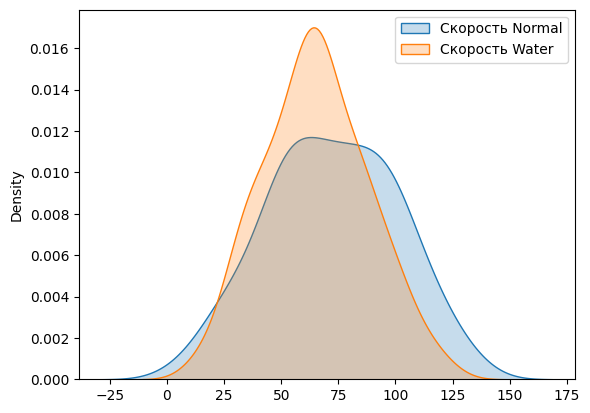

In [ ]:
seaborn.kdeplot(data=Normal_speed, label='Скорость Normal', fill=True);
seaborn.kdeplot(data=Water_speed, label='Скорость Water', fill=True)
plt.legend()
plt.show()

In [ ]:
print(f"Средняя для Normal_speed: {round(np.mean(Normal_speed), 2)}")
print(f"Средняя для Water_speed: {round(np.mean(Water_speed), 2)}")

Средняя для Normal_speed: 72.25
Средняя для Water_speed: 64.98


In [ ]:
levene_(Normal_speed, Water_speed)

'Вариация в группах различаются! p-value - 0.00714; Статистика - 7.37000'

In [ ]:
stat, p = stats.ttest_ind(Normal_speed, Water_speed, equal_var=False)
if p > 0.05:
  print(f"Не отклоняем нулевую гипотезу. H0 - выборки не имеют стат. значимых различий. Статистика = {stat:.5f}, p-value={p:.5f}")
else:
  print(f"Отклоняем нулевую гипотезу. H0 - выборки статистически различаются. Статистика = {stat:.5f}, p-value={p:.5f}")

Отклоняем нулевую гипотезу. H0 - выборки статистически различаются. Статистика = 2.10299, p-value=0.03677


In [ ]:
df_Normal_speed = pd.DataFrame({'Normal':Normal_speed})
df_Water_speed = pd.DataFrame({'Water':Water_speed})
df_concat_speed = pd.concat([df_Normal_speed, df_Water_speed], axis=1)
df_melt_speed = pd.melt(df_concat_speed.reset_index(), id_vars=['index'], value_vars=['Normal',	'Water'],var_name='Pokemon_Class', value_name='Speed')
df_melt_speed.head()

,index,Pokemon_Class,Speed
0,0,Normal,85.0
1,1,Normal,115.0
2,2,Normal,120.0
3,3,Normal,50.0
4,4,Normal,20.0


In [ ]:
df_melt_speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          252 non-null    int64  
 1   Pokemon_Class  252 non-null    object 
 2   Speed          228 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [ ]:
# ОБРАБОТКА ДАТАФРЕЙМА ПЕРЕД ТЕСТОМ ТЬЮКИ!!!! УДАЛИМ ПУСТЫЕ ЗНАЧЕНИЯ. ВСЕГО ДОЛЖНО БЫТЬ 228
df_melt_speed.dropna(subset='Speed', inplace=True)
df_melt_speed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 0 to 251
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          228 non-null    int64  
 1   Pokemon_Class  228 non-null    object 
 2   Speed          228 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.1+ KB


In [ ]:
# Однофакторный дисперсионный анализ:

f_stats, p = stats.f_oneway(Normal_speed, Water_speed)
if p > 0.05:
  print(f"Нулевую гипотизу не отклоняем - H0. СРЕДНЕЕ ЗНАЧЕНИЕ, вероятно, одинаковые. т.к p-value = {p:.10f}. Статистика = {f_stats:.5f}")
else:
  print(f"Подтверждаем альтернативную гипотизу- H1. СРЕДНЕЕ ЗНАЧЕНИЕ, вероятно, различаются. т.к p-value = {p:.10f}. Статистика = {f_stats:.5f}")

Подтверждаем альтернативную гипотизу- H1. СРЕДНЕЕ ЗНАЧЕНИЕ, вероятно, различаются. т.к p-value = 0.0324535855. Статистика = 4.63130


In [ ]:
# Множественное сравнение - кретерии Тьюки (ПОНЯТНО ЧТО ВСЕГО ДВА ВАРИАНТА, НО ДЛЯ ЗАКРЕПЛЕНИЯ МАТЕРИАЛА!!!)

tukey = mc.pairwise_tukeyhsd(endog=df_melt_speed['Speed'].values,
                          groups=df_melt_speed['Pokemon_Class'],
                          alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Normal  Water   -7.261 0.0325 -13.9095 -0.6125   True
-----------------------------------------------------


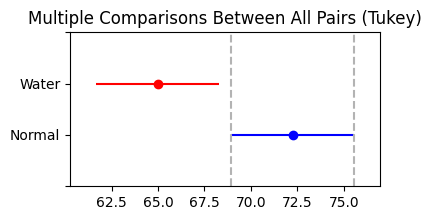

In [ ]:
tukey.plot_simultaneous(comparison_name="Normal", figsize=(4, 2));

In [ ]:
print(f"Средняя для Normal_speed: {round(np.mean(Normal_speed), 2)}")
print(f"Средняя для Water_speed: {round(np.mean(Water_speed), 2)}")

Средняя для Normal_speed: 72.25
Средняя для Water_speed: 64.98


**ВЫВОД**: ДА,  действительно, покемоны в классе **Water** в среднем быстрее, чем покемоны в классе **Normal**.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
pokemon.head(1)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,TOTAL
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,NaN


In [ ]:
pokemon.Speed.info()

<class 'pandas.core.series.Series'>
RangeIndex: 800 entries, 0 to 799
Series name: Speed
Non-Null Count  Dtype
--------------  -----
800 non-null    int64
dtypes: int64(1)
memory usage: 6.4 KB


In [ ]:
tP_speed_val = pokemon.loc[pokemon['Name'].isin(treathed_pokemon),:]['Speed'].values
tP_speed_val

array([145, 150, 150, 135])

In [ ]:
full_speed_val = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon),:]['Speed'].values
len(full_speed_val)

796

In [ ]:
f_stats, p_val = stats.f_oneway(tP_speed_val, full_speed_val)
if p_val > 0.05:
  print(f"Нулевую гипотизу не отклоняем - H0. СРЕДНЕЕ ЗНАЧЕНИЕ, вероятно, одинаковые. т.к p-value = {p_val:.10f}. Статистика = {f_stats:.5f}")
else:
  print(f"Подтверждаем альтернативную гипотизу- H1. СРЕДНЕЕ ЗНАЧЕНИЕ, вероятно, различаются. т.к p-value = {p_val:.10f}. Статистика = {f_stats:.5f}")

Подтверждаем альтернативную гипотизу- H1. СРЕДНЕЕ ЗНАЧЕНИЕ, вероятно, различаются. т.к p-value = 0.0000000952. Статистика = 29.00261


In [ ]:
df_tp_speed = pokemon.loc[pokemon['Name'].isin(treathed_pokemon),:].agg({'Speed': ['mean', 'std']})
df_others_speed = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon),:].agg({'Speed': ['mean', 'std']})

In [ ]:
# Статистика treathed_pokemon
df_tp_speed

,Speed
mean,145.000000
std,7.071068


In [ ]:
# Статистика остальных покемонов
df_others_speed

,Speed
mean,67.891960
std,28.614785


<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon.head(1)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False


In [ ]:
sum_Legendary = pokemon.loc[pokemon['Legendary'], ['HP',	'Attack',	'Defense']].values.sum()
sum_others = pokemon.loc[~pokemon['Legendary'], ['HP',	'Attack',	'Defense']].values.sum()
print(f'Сумма характеристик HP,Attack,Defense всех легендарных покемонов: {sum_Legendary}'
      f'\nСумма характеристик HP,Attack,Defense всех остальных покемонов: {sum_others}')

Сумма характеристик HP,Attack,Defense всех легендарных покемонов: 60270
Сумма характеристик HP,Attack,Defense всех остальных покемонов: 157592


In [ ]:
# Формирование датафрейма с необходимыми минимальными данными
df_Legendary = pokemon.loc[pokemon['Legendary'], ['HP',	'Attack',	'Defense']]
df_others = pokemon.loc[~pokemon['Legendary'], ['HP',	'Attack',	'Defense']]

In [ ]:
# Создание нового столбца - сумма исследуюмых характеристик
df_Legendary['summa'] = df_Legendary[['HP',	'Attack',	'Defense']].sum(axis=1)
df_others['summa'] = df_others[['HP',	'Attack',	'Defense']].sum(axis=1)

In [ ]:
# Создание нового столбца - произведение исследуюмых характеристик
df_Legendary['multiplication'] = df_Legendary['HP'] * df_Legendary['Attack'] * df_Legendary['Defense']
df_others['multiplication'] = df_others['HP'] * df_others['Attack'] * df_others['Defense']

In [ ]:
df_Legendary.head(3)

,HP,Attack,Defense,summa,multiplication
156,275,275,275,825,20796875
157,265,265,265,795,18609625
158,280,280,280,840,21952000


In [ ]:
df_others.head(3)

,HP,Attack,Defense,summa,multiplication
0,45,49,49,143,108045
1,60,62,63,185,234360
2,80,82,83,245,544480


In [ ]:
array_sum_Legendary = df_Legendary['summa'].values
array_sum_others = df_others['summa'].values

In [ ]:
array_multip_Legendary = df_Legendary['multiplication'].values
array_multip_others = df_others['multiplication'].values

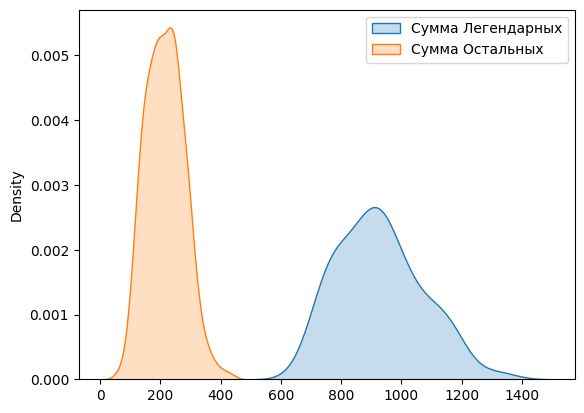

Среднее значение сумм у Легендарных: 927.23
Среднее значение сумм у Остальных: 214.41


In [ ]:
seaborn.kdeplot(array_sum_Legendary, label = 'Сумма Легендарных', fill=True);
seaborn.kdeplot(array_sum_others, label= 'Сумма Остальных', fill=True)
plt.legend()
plt.show()
print(f'Среднее значение сумм у Легендарных: {round(np.mean(array_sum_Legendary), 2)}'
      f'\nСреднее значение сумм у Остальных: {round(np.mean(array_sum_others), 2)}')

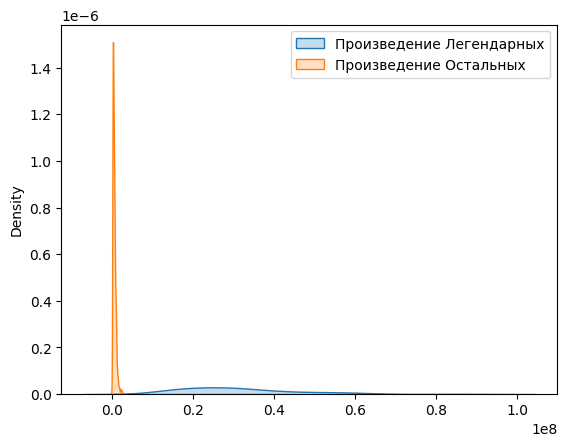

Среднее значение сумм у Легендарных: 31540872.86
Среднее значение сумм у остальных: 425041.39


In [ ]:
seaborn.kdeplot(array_multip_Legendary, label = 'Произведение Легендарных', fill=True);
seaborn.kdeplot(array_multip_others, label= 'Произведение Остальных', fill=True)
plt.legend()
plt.show()
print(f'Среднее значение сумм у Легендарных: {round(np.mean(array_multip_Legendary), 2)}'
      f'\nСреднее значение сумм у остальных: {round(np.mean(array_multip_others), 2)}')

In [ ]:
stat, p = stats.ttest_ind(array_sum_others, array_sum_Legendary, equal_var=False)
if p > 0.05:
  print(f"Не отклоняем нулевую гипотезу. H0 - выборки не имеют стат. значимых различий. Статистика = {stat:.5f}, p-value={p:.5f}")
else:
  print(f"Отклоняем нулевую гипотезу. H0 - выборки статистически различаются. Статистика = {stat:.5f}, p-value={p:.5f}")

Отклоняем нулевую гипотезу. H0 - выборки статистически различаются. Статистика = -17.00515, p-value=0.00000


In [ ]:
stat, p = stats.ttest_ind(array_multip_others, array_multip_Legendary, equal_var=False)
if p > 0.05:
  print(f"Не отклоняем нулевую гипотезу. H0 - выборки не имеют стат. значимых различий. Статистика = {stat:.5f}, p-value={p:.5f}")
else:
  print(f"Отклоняем нулевую гипотезу. H0 - выборки статистически различаются. Статистика = {stat:.5f}, p-value={p:.5f}")

Отклоняем нулевую гипотезу. H0 - выборки статистически различаются. Статистика = -17.00515, p-value=0.00000


**ВЫВОД_1:**

Сумма характеристик HP, Attack, Defense у ***легендарных покемонов*** ЗНАЧИТЕЛЬНО больше, чем у других покемонов!

**ВЫВОД_2:**

Произведение
 характеристик HP, Attack, Defense у ***легендарных покемонов*** ЗНАЧИТЕЛЬНО больше, чем у других покемонов!

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
   

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

</div>

In [ ]:
pokemon.head(1)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,TOTAL
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,NaN


In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
# ПОКЕМОНЫ 'Rock', 'Ground', 'Steel', 'Ice' РАСПОЛОГАЮТСЯ В РАЗНЫХ КЛАССАХ. ФИЛЬТРУЮ ОТДЕЛЬНО!
df_best_defence_Class_1 = pokemon.loc[pokemon['Class 1'].isin(best_defence_class), ['Class 1', 'Defense']]
df_best_defence_Class_1['Class 1'].value_counts()

,count
Class 1,
Rock,44
Ground,32
Steel,27
Ice,24


In [ ]:
# Переименовываю столбец для последующей конкатенации
df_best_defence_Class_1.rename(columns={'Class 1': 'best'}, inplace=True)

In [ ]:
df_best_defence_Class_2 = pokemon.loc[pokemon['Class 2'].isin(best_defence_class), ['Class 2', 'Defense']]
df_best_defence_Class_2['Class 2'].value_counts()

,count
Class 2,
Ground,35
Steel,22
Ice,14
Rock,14


In [ ]:
# Переименовываю столбец для последующей контагенации
df_best_defence_Class_2.rename(columns={'Class 2': 'best'}, inplace=True)

In [ ]:
# Теперь чётко получается все 212 покемонов ('Rock', 'Ground', 'Steel', 'Ice') из разных классов в одном датафрейме для удобной обработки
df_best_defence = pd.concat([df_best_defence_Class_1, df_best_defence_Class_2])
df_best_defence.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 32 to 794
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   best     212 non-null    object
 1   Defense  212 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.0+ KB


In [ ]:
df_best_defence.head(3)

,best,Defense
32,Ground,85
33,Ground,110
55,Ground,25


In [ ]:
array_Rock = df_best_defence.loc[df_best_defence['best']=='Rock']['Defense'].values
array_Ground = df_best_defence.loc[df_best_defence['best']=='Ground']['Defense'].values
array_Steel = df_best_defence.loc[df_best_defence['best']=='Steel']['Defense'].values
array_Ice = df_best_defence.loc[df_best_defence['best']=='Ice']['Defense'].values

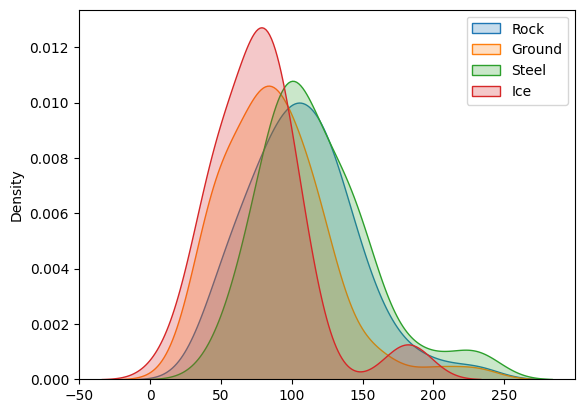

In [ ]:
seaborn.kdeplot(array_Rock, label='Rock', fill=True)
seaborn.kdeplot(array_Ground, label='Ground', fill=True)
seaborn.kdeplot(array_Steel, label='Steel', fill=True)
seaborn.kdeplot(array_Ice, label='Ice', fill=True)
plt.legend()
plt.show()

In [ ]:
tukey = mc.pairwise_tukeyhsd(endog=df_best_defence['Defense'].values,
                          groups=df_best_defence['best'],
                          alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Ground    Ice -11.0436 0.4746 -30.8773  8.7901  False
Ground   Rock  19.3847 0.0235   1.8684  36.901   True
Ground  Steel  28.9108 0.0004  10.5525  47.269   True
   Ice   Rock  30.4283 0.0008  10.0453 50.8113   True
   Ice  Steel  39.9544    0.0  18.8434 61.0653   True
  Rock  Steel    9.526 0.5627  -9.4244 28.4764  False
-----------------------------------------------------


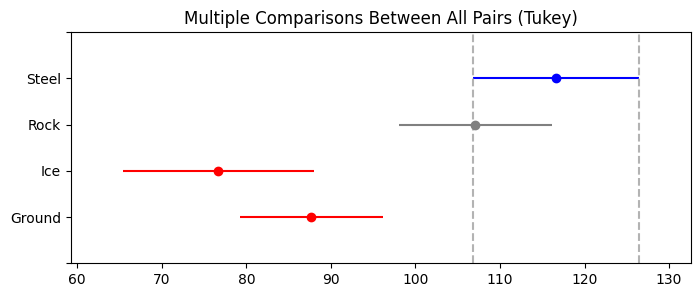

In [ ]:
tukey.plot_simultaneous(comparison_name='Steel', figsize=(8, 3));

**ВЫВОД:**

Между собой **Rock** и **Steel** - не отличаются по уровню защиты статистически значимо!

Между собой **Ground** и **Ice** - не отличаются по уровню защиты статистически значимо!

*В остальных комбинациях покемоны по уровню защиты статистически ОТЛИЧАЮТСЯ.*


---




# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.